# **Reservoir Geomechanics EDX Course (GEOPHYSX0001)- Homework 01**

The Stanford Online Reservoir Geomechanics course is available at [EDX](https://courses.edx.org/courses/course-v1:StanfordOnline+GEOPHYSX0001+2T2020/course/). You can find more information about the course [here](https://online.stanford.edu/courses/soeees-ygeoresgeo202-reservoir-geomechanics).<br>

This file contains answers to homework number one. You should follow the questions available in the file `Reservoir_Geomechanics_MOOC_HW1_2020.pdf` to understand the answers provided by the present file.<br>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Plot the charts inside the Notebook.
%matplotlib inline
# Plot the charts on a new Matplotlib window.
# %matplotlib qt  

In [2]:
# Folder that holds the data provided by EDX.
DATA = "data"

---

## Table of Contents

* [Read the Data](#read-data)
* [I. Compute the Overburden Stress and the Overburden Gradient](#compute-overburden)
>* [1. Make a plot of density versus depth](#plot-data)
>* [2. “Block” the log into 5 depth units](#plot-chunks)
>* [3. Calculate and plot the overburden stress](#overburden-stress)
>* [4. Calculate the overburden gradient](#overburden-gradient)
* [II. Compute Porosity From Density Measurements](#compute-porosity)
* [III. Answer the questions](#answer)
* [References](#references)

---

## Read the Data <a class="anchor" id="read-data"></a>

The following files are provided by EDX, and are stored in the `data` folder:
* `Barnett_density_data.txt`
* `GOM_offshore_density_data.txt`

Opening the files using a text editor, it is possible to see that both have the same structure. We can see that:<br>

1 - The first line holds the headers.<br>
2 - The second line is blank.<br>
3 - The third line is the first line that contains data.<br>
4 - The first column contains the depth in `ft`.<br>
5 - The second column contains the density in `g/cm^3`.

#### Barnett data:

In [3]:
# Read the data:
barnett_bottom = pd.read_csv(os.path.join(DATA, "Barnett_density_data.txt"), 
                             sep='\t',
                             header=0,
                             names=["depth_(ft)", "density_(g/cm^3)"])
# Take a look:
barnett_bottom.head()

,depth_(ft),density_(g/cm^3)
0,100.5,1.8778
1,101.0,1.8709
2,101.5,1.8317
3,102.0,1.8363
4,102.5,1.8500


In [4]:
# Check if there are NANs:
barnett_bottom.isnull().any()

depth_(ft)          False
density_(g/cm^3)     True
dtype: bool

In [5]:
# Drop duplicates:
barnett_bottom.dropna(inplace=True)
# Check:
barnett_bottom.isnull().any()

depth_(ft)          False
density_(g/cm^3)    False
dtype: bool

In [6]:
barnett_bottom.head()

,depth_(ft),density_(g/cm^3)
0,100.5,1.8778
1,101.0,1.8709
2,101.5,1.8317
3,102.0,1.8363
4,102.5,1.8500


#### GOM data:

In [7]:
# Read the data:
gom_bottom = pd.read_csv(os.path.join(DATA, "GOM_offshore_density_data.txt"), 
                         sep='\t',
                         header=0,
                         names=["depth_(ft)", "density_(g/cm^3)"])
# Take a look:
gom_bottom.head()

,depth_(ft),density_(g/cm^3)
0,3515,2.154
1,3516,2.126
2,3517,2.098
3,3518,2.063
4,3519,2.084


In [8]:
# Check if there are NANs:
gom_bottom.isnull().any()

depth_(ft)          False
density_(g/cm^3)    False
dtype: bool

---

## I. Compute the overburden stress and the overburden gradient <a class="anchor" id="compute-overburden"></a>

Define a function to plot the data.

In [54]:
def plot_profile(title, 
                 y, axis_y_label, y_legend, y_limits, 
                 x, axis_x_label, x_legend, x_limits):
    """Function to plot the data."""
    plt.figure(figsize=(16,16))
    
    # Plot the x1:
    plt.plot(x1, y, 
             color="blue", 
             linewidth=0.5,
             label="density")
    
    # Plot the x2, if it was given:
    if x2  is not None:   
        plt.plot(x2, y, 
                 "r--", 
                 linewidth=3.0,
                 label="blocked density")
    
    # Set the Y limits and reverse it:
    plt.ylim(np.int(np.ceil(np.max(y)/1000.))*1000, 0)
    
    # Set X limits:
    plt.xlim(1.0, None)
    
    # Set the figure title:
    plt.title(title, y= 1.02, fontsize=24)
    
    # Set X and Y titles and font sizes:
    plt.xlabel("Density (g/cm³)", fontsize=20)
    plt.ylabel("Depth (ft)", fontsize=20)
    
    # Set the grid properties
    plt.grid(True)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    # Insert a legend:
    plt.legend(prop={'size': 16})

In [52]:
def plot_profileX(title, y, x1, x2=None):
    """Function to plot the data."""
    plt.figure(figsize=(16,16))
    
    # Plot the x1:
    plt.plot(x1, y, 
             color="blue", 
             linewidth=0.5,
             label="density")
    
    # Plot the x2, if it was given:
    if x2  is not None:   
        plt.plot(x2, y, 
                 "r--", 
                 linewidth=3.0,
                 label="blocked density")
    
    # Set the Y limits and reverse it:
    plt.ylim(np.int(np.ceil(np.max(y)/1000.))*1000, 0)
    
    # Set X limits:
    plt.xlim(1.0, None)
    
    # Set the figure title:
    plt.title(title, y= 1.02, fontsize=24)
    
    # Set X and Y titles and font sizes:
    plt.xlabel("Density (g/cm³)", fontsize=20)
    plt.ylabel("Depth (ft)", fontsize=20)
    
    # Set the grid properties
    plt.grid(True)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    # Insert a legend:
    plt.legend(prop={'size': 16})

___

### 1. Make a plot of density versus depth <a class="anchor" id="plot-data"></a>

#### Barnett data:<BR>

**"_Barnett data – assume a reasonable surface density 1.8778g/cm³ to extrapolate to the first measurement point._"**

In [10]:
# Create a data frame that represents the surface data, assuming surface density = 1.8778g/cm^3 to extrapolate to the first measurement point:
barnett_surface = pd.DataFrame({"depth_(ft)": [0.0], "density_(g/cm^3)": [1.8778]})
# Check:
barnett_surface

,depth_(ft),density_(g/cm^3)
0,0.0,1.8778


In [11]:
# Concatenate both surface and bottom dataframes:
barnett = pd.concat([barnett_surface, barnett_bottom], ignore_index=True)
# Take a look:
barnett.head()

,depth_(ft),density_(g/cm^3)
0,0.0,1.8778
1,100.5,1.8778
2,101.0,1.8709
3,101.5,1.8317
4,102.0,1.8363


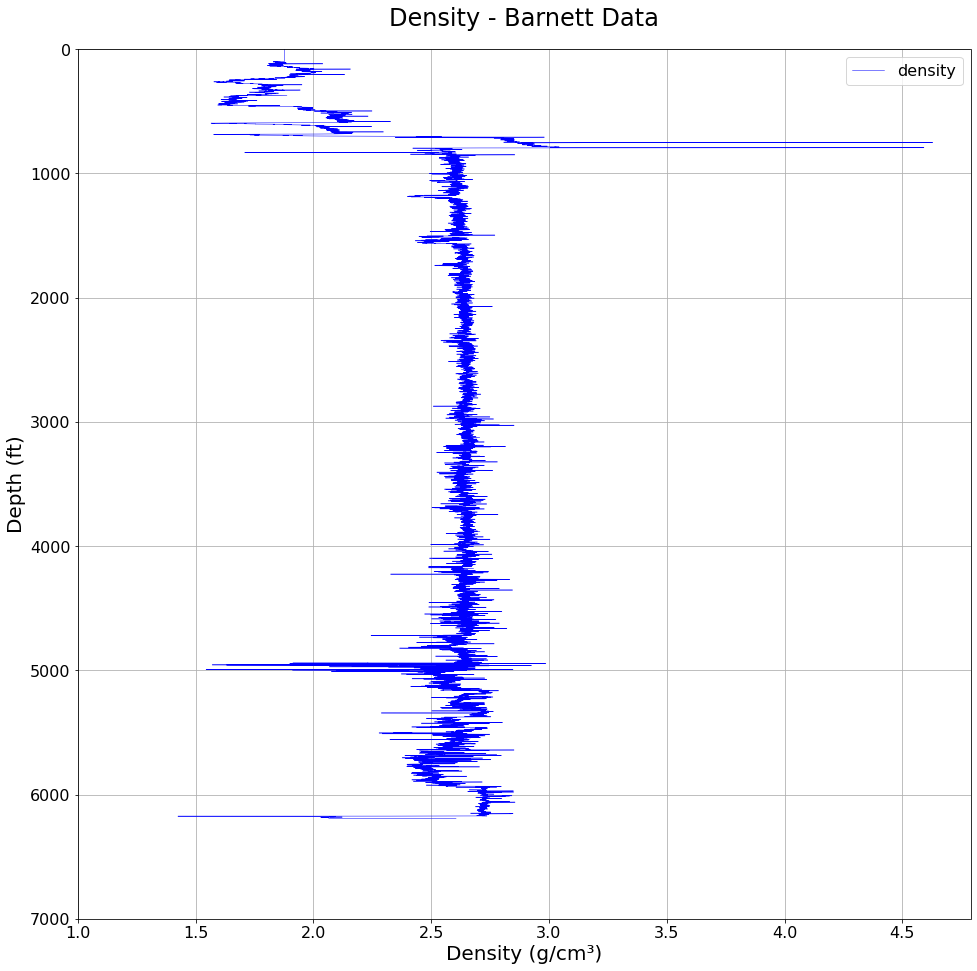

In [12]:
# Plot:
plot_profile("Density - Barnett Data", barnett["depth_(ft)"], barnett["density_(g/cm^3)"])

#### GOM data:<br>

**"_GOM data – use a density of 1.0 g/cm³ from the surface to the sea floor (depth of 1000ft) and a formation density of 1.7g/cm³ at the sea floor. Linearly interpolate the density between the sea floor and the depth at which the data starts (at the depth of 3515 ft)._"**

In [13]:
# Create a data frame that represents the sea data, assuming the sea water density = 1.0g/cm^3:
gom_sea = pd.DataFrame({"depth_(ft)": [0.0, 1000], "density_(g/cm^3)": [1.0, 1.0]})
# Check:
gom_sea

,depth_(ft),density_(g/cm^3)
0,0.0,1.0
1,1000.0,1.0


In [14]:
# Create a data frame that represents the surface data.

# Create a vector that represents the depth from the sea bottom to the first given point:
gom_surface_depth = np.arange(1000, 3516, 1, dtype=np.float32)

# Create a vector that represents the density from the sea bottom to the first given point interpolating linearly:
first_measured_density = gom_bottom[gom_bottom["depth_(ft)"] == 3515]["density_(g/cm^3)"].values[0]
gom_surface_density = np.linspace(1.7, 
                                  first_measured_density, 
                                  num=gom_surface_depth.shape[0], 
                                  endpoint=True, 
                                  dtype=np.float32)

# Create the surface dataframe:
gom_surface = pd.DataFrame({"depth_(ft)": gom_surface_depth, "density_(g/cm^3)": gom_surface_density})
# Remove the first and last points because the are already part of the sea and the bottom data frames.
gom_surface = gom_surface[1:len(gom_surface)-1]
# Take a look:
gom_surface.head()

,depth_(ft),density_(g/cm^3)
1,1001.0,1.700181
2,1002.0,1.700361
3,1003.0,1.700541
4,1004.0,1.700722
5,1005.0,1.700903


In [15]:
# Check:
gom_surface.tail()

,depth_(ft),density_(g/cm^3)
2510,3510.0,2.153097
2511,3511.0,2.153278
2512,3512.0,2.153458
2513,3513.0,2.153639
2514,3514.0,2.153820


In [16]:
# Concatenate the sea, surface, and bottom dataframes:
gom = pd.concat([gom_sea, gom_surface, gom_bottom], ignore_index=True)
# Take a look:
gom.head()

,depth_(ft),density_(g/cm^3)
0,0.0,1.000000
1,1000.0,1.000000
2,1001.0,1.700181
3,1002.0,1.700361
4,1003.0,1.700541


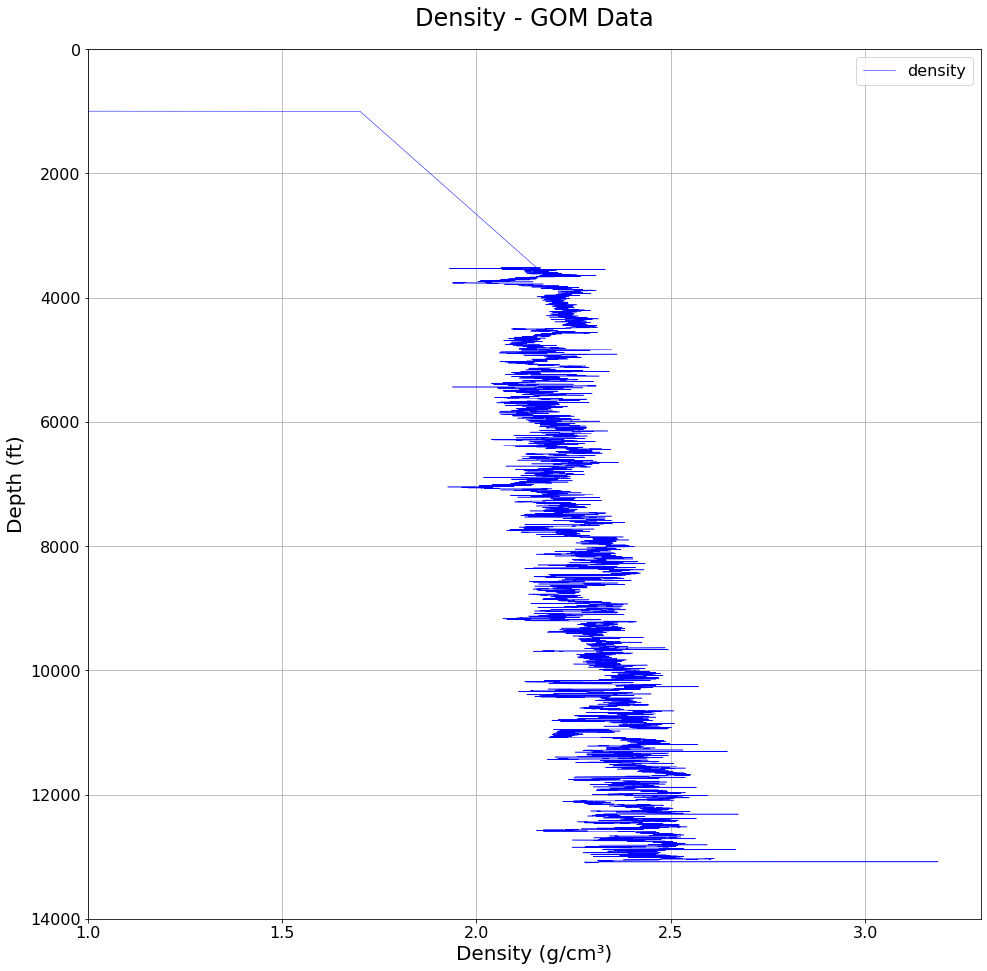

In [17]:
# Plot:
plot_profile("Density - GOM Data", gom["depth_(ft)"], gom["density_(g/cm^3)"])

___

### 2.“Block” the log into 5 depth units <a class="anchor" id="plot-chunks"></a>

**"_“Block” the log into 5 depth units by assuming an approximately constant density over a given range of depths. Compute and plot the averaged density in each block and your blocked density as a function of depth for each dataset._"**

#### Barnett data:<br>

Inspecting the Barnett chart visually:

In [18]:
# Depths to brake. Bear in mind that the first and the last datapoints are the limits.
barnett_edges = [-100, 800., 1200., 4900., 5900., 7000.]
# Labels for each block:
blocks = ["block_01", "block_02", "block_03", "block_04", "block_05"]

In [19]:
# Break the data into blocks, according to its depth:
barnett["block"] = pd.cut(barnett["depth_(ft)"],
                          barnett_edges, 
                          labels=blocks)
# Take a look:
barnett.head()

,depth_(ft),density_(g/cm^3),block
0,0.0,1.8778,block_01
1,100.5,1.8778,block_01
2,101.0,1.8709,block_01
3,101.5,1.8317,block_01
4,102.0,1.8363,block_01


In [20]:
# Compute the density of each block:
for block in blocks:
    barnett.loc[barnett["block"] == block, "block_density_(g/cm^3)"] = barnett.loc[barnett["block"] == block, "density_(g/cm^3)"].mean()
# Check:
barnett.head()

,depth_(ft),density_(g/cm^3),block,block_density_(g/cm^3)
0,0.0,1.8778,block_01,2.032218
1,100.5,1.8778,block_01,2.032218
2,101.0,1.8709,block_01,2.032218
3,101.5,1.8317,block_01,2.032218
4,102.0,1.8363,block_01,2.032218


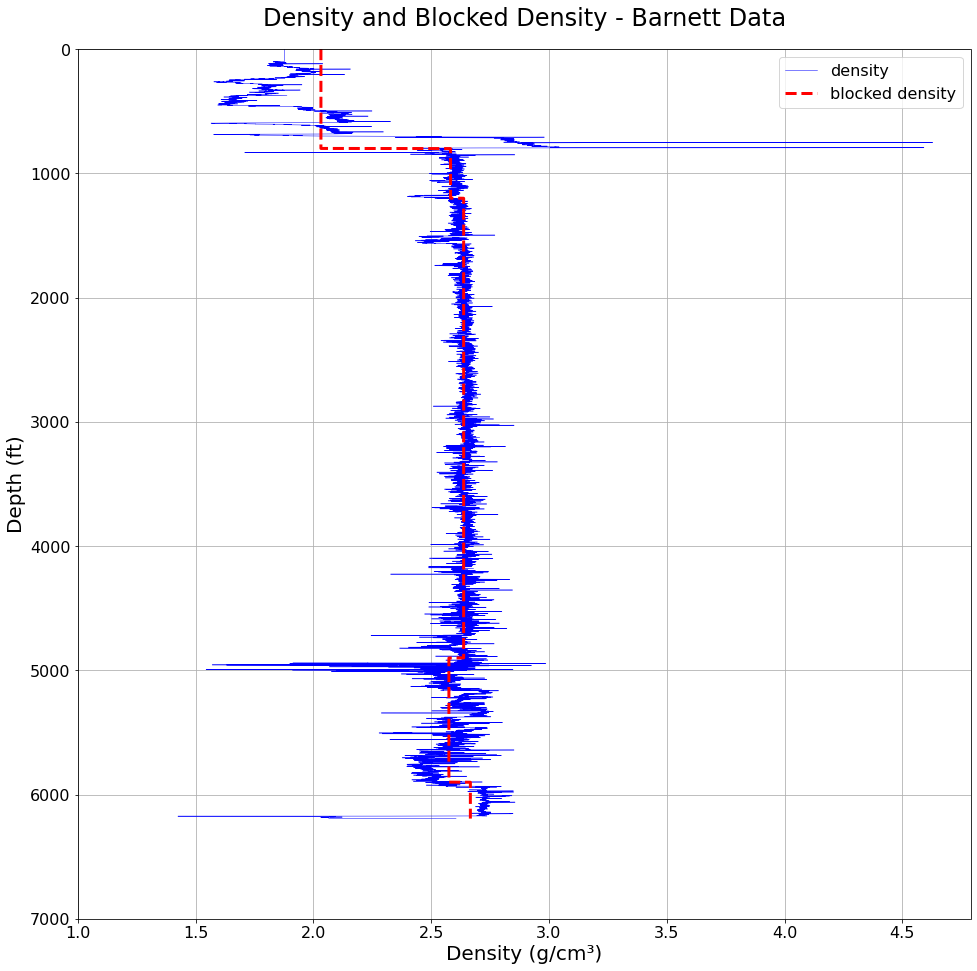

In [21]:
# Plot:
plot_profile("Density and Blocked Density - Barnett Data",
             barnett["depth_(ft)"], 
             barnett["density_(g/cm^3)"], 
             barnett["block_density_(g/cm^3)"])

#### GOM data:<br>

In [22]:
# Depths to brake. Bear in mind that the first and the last datapoints are the limits.
gom_edges = [-100, 1000., 3515., 8000., 11000., 20000.]

In [23]:
# Break the data into blocks, according to its depth:
gom["block"] = pd.cut(gom["depth_(ft)"],
                      gom_edges, 
                      labels=blocks)
# Take a look:
gom.head()

,depth_(ft),density_(g/cm^3),block
0,0.0,1.000000,block_01
1,1000.0,1.000000,block_01
2,1001.0,1.700181,block_02
3,1002.0,1.700361,block_02
4,1003.0,1.700541,block_02


In [24]:
# Compute the density of each block:
for block in blocks:
    gom.loc[gom["block"] == block, "block_density_(g/cm^3)"] = gom.loc[gom["block"] == block, "density_(g/cm^3)"].mean()
# Check:
gom.head()

,depth_(ft),density_(g/cm^3),block,block_density_(g/cm^3)
0,0.0,1.000000,block_01,1.00000
1,1000.0,1.000000,block_01,1.00000
2,1001.0,1.700181,block_02,1.92709
3,1002.0,1.700361,block_02,1.92709
4,1003.0,1.700541,block_02,1.92709


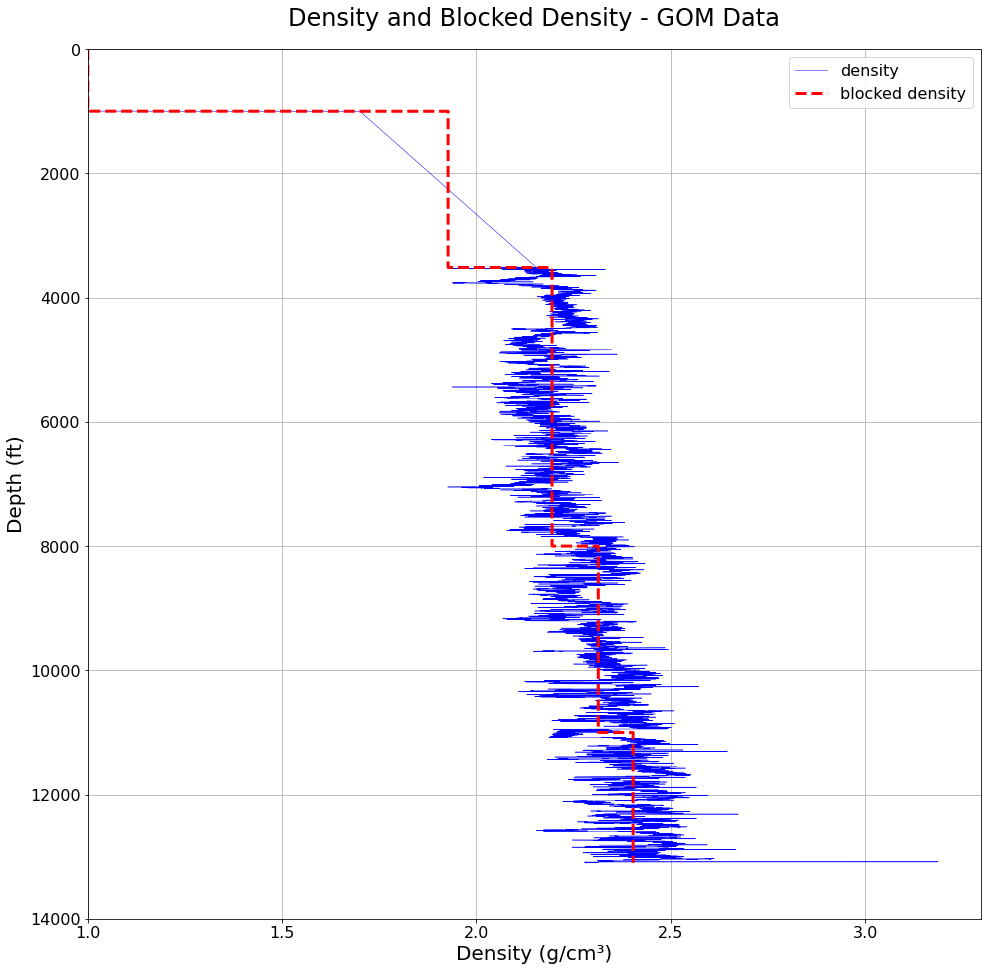

In [25]:
# Plot:
plot_profile("Density and Blocked Density - GOM Data", 
             gom["depth_(ft)"], 
             gom["density_(g/cm^3)"], 
             gom["block_density_(g/cm^3)"])

___

### 3. Calculate and plot the overburden stress <a class="anchor" id="overburden-stress"></a>

**"_Calculate and plot the overburden stress as a function of depth using both the “blocked”
log and the continuous densities for each dataset. On the same plot, show hydrostatic
pore pressure 0.44 psi/ft versus depth as a reference. Use 9.8 m/s2 to approximate g, the
acceleration due to gravity._"**

See: Zoback M. D. page 9, equation 1.6:

$S_v = \rho_w*g*Z_w + \int\limits_{Z_w}^Z \rho(z)* g \ dz \approx \overline{\rho} * g * (Z - Z_w)$

Set some constants to help with the calculations.

In [26]:
# Acceleration due to gravity:
g = 9.80  # m/2^2

In [27]:
# Hydrostatic gradient:
h = 0.44  # psi/ft

In [28]:
# Constant to convert FROM: (g/cm^3) * (m/s^2) * ft TO: psi
c1 = 1/1000  # 1000g = 1kg
c2 = 1/(1000000) # 1m^3 = 10^6m^3
c3 = 0.3048  # 1ft = 0.3048cm
# kg * m/s^2 = N
# N / m^2 = Pa
c4 = 0.000145038  # 1Pa = 1N/m^2 = 0.000145038psi
c = c1 / c2 * c3 *  c4
c

0.04420758240000001

Define a function to calculate the overburden stresses and hydrostatic pore pressure.

In [29]:
def set_overburden_and_hydrostatic(df, g, h, c):
    # Calculate the height difference between rows:
    df["dz_(ft)"] = df["depth_(ft)"].diff()
    df["dz_(ft)"].at[0] = 0.0  # There's no previous row to the first row, so the difference is zero.
        
    # Calculate the hydrostatic pore pressure:
    df["hydrostatic_(psi)"] = (0.44 * df["dz_(ft)"]).cumsum()
    
    # Calculate the overburden stress:
    df["overburden_(psi)"] = (df["density_(g/cm^3)"] * g *  df["dz_(ft)"] * c).cumsum()
    df["block_overburden_(psi)"] = (df["block_density_(g/cm^3)"] * g *  df["dz_(ft)"] * c).cumsum()
    return df

Define a function to plot the overburden stresses and hydrostatic pore pressure.

In [30]:
def plot_overburden_and_hydrostatic(title, y, x1, x2, x3):
    """Function to plot the data."""    
    plt.figure(figsize=(16,16))
    
    # Plot the overburden stress in psi:
    plt.plot(x1, y, 
             color="blue", 
             linewidth=3.0,
             label="overburden stress")
    
    # Plot the blocked overburden stress in psi:
    plt.plot(x2, y, 
             "r--", 
             linewidth=3.0,
             label="blocked overburden stress")
    
    # Plot the hydrostatic pore pressure:
    plt.plot(x3, y,
             "g--",
             linewidth=3.0,
             label="hydrostatic pore pressure")
    
    # Set the Y limits and reverse it:
    plt.ylim(np.int(np.ceil(np.max(y)/1000.))*1000, 0)
    
    # Set the X limits
    x_max = max(np.max(x1), np.max(x2), np.max(x3))
    x_max = np.int(np.ceil(x_max/1000)) * 1000
    plt.xlim(0, x_max)
    
    # Set the figure title:
    plt.title(title, y= 1.02, fontsize=24)
    
    # Set X and Y titles and font sizes:
    plt.xlabel("Stress (psi)", fontsize=20)
    plt.ylabel("Depth (ft)", fontsize=20)
    
    # Set the grid properties
    plt.grid(True)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    # Insert a legend:
    plt.legend(prop={'size': 16})

#### Barnett data:<br>

In [31]:
# Perform the calculations:
barnett = set_overburden_and_hydrostatic(barnett, g, h, c)
# Check:
barnett

,depth_(ft),density_(g/cm^3),block,block_density_(g/cm^3),dz_(ft),hydrostatic_(psi),overburden_(psi),block_overburden_(psi)
0,0.0,1.8778,block_01,2.032218,0.0,0.00,0.000000,0.000000
1,100.5,1.8778,block_01,2.032218,100.5,44.22,81.759502,88.482890
2,101.0,1.8709,block_01,2.032218,0.5,44.44,82.164771,88.923104
3,101.5,1.8317,block_01,2.032218,0.5,44.66,82.561549,89.363317
4,102.0,1.8363,block_01,2.032218,0.5,44.88,82.959323,89.803530
...,...,...,...,...,...,...,...,...
12183,6191.5,2.0703,block_05,2.666482,0.5,2724.26,6826.540958,6832.872559
12184,6192.0,2.0857,block_05,2.666482,0.5,2724.48,6826.992756,6833.450164
12185,6192.5,2.1434,block_05,2.666482,0.5,2724.70,6827.457054,6834.027770
12186,6193.0,2.3314,block_05,2.666482,0.5,2724.92,6827.962075,6834.605376


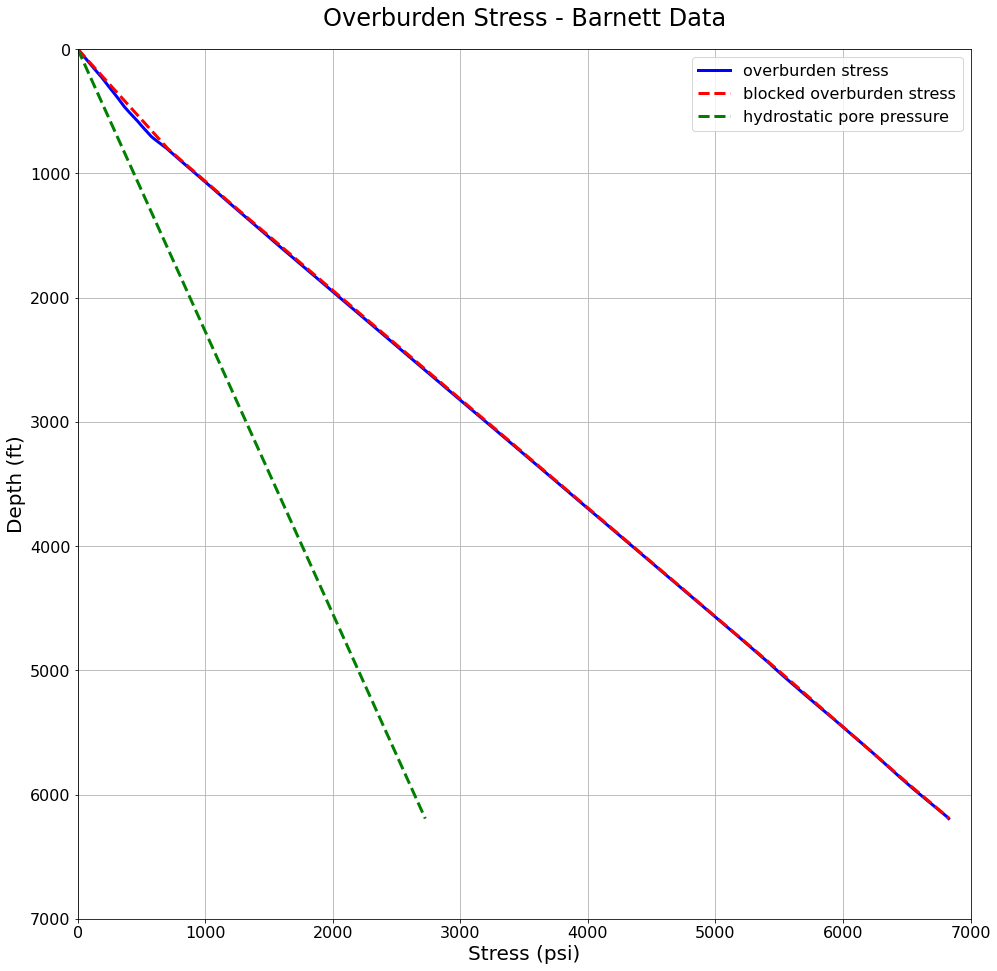

In [32]:
# Plot:
plot_overburden_and_hydrostatic("Overburden Stress - Barnett Data", 
                                barnett["depth_(ft)"], 
                                barnett["overburden_(psi)"], 
                                barnett["block_overburden_(psi)"], 
                                barnett["hydrostatic_(psi)"])

#### GOM data:<br>

In [33]:
# Perform the calculations:
gom = set_overburden_and_hydrostatic(gom, g, h, c)
# Check:
gom

,depth_(ft),density_(g/cm^3),block,block_density_(g/cm^3),dz_(ft),hydrostatic_(psi),overburden_(psi),block_overburden_(psi)
0,0.0,1.000000,block_01,1.000000,0.0,0.00,0.000000,0.000000
1,1000.0,1.000000,block_01,1.000000,1000.0,440.00,433.234308,433.234308
2,1001.0,1.700181,block_02,1.927090,1.0,440.44,433.970884,434.069189
3,1002.0,1.700361,block_02,1.927090,1.0,440.88,434.707539,434.904071
4,1003.0,1.700541,block_02,1.927090,1.0,441.32,435.444272,435.738952
...,...,...,...,...,...,...,...,...
12097,13096.0,2.314000,block_05,2.403178,1.0,5762.24,11986.550494,11986.363462
12098,13097.0,2.314000,block_05,2.403178,1.0,5762.68,11987.552998,11987.404601
12099,13098.0,2.294000,block_05,2.403178,1.0,5763.12,11988.546837,11988.445740
12100,13099.0,2.294000,block_05,2.403178,1.0,5763.56,11989.540677,11989.486879


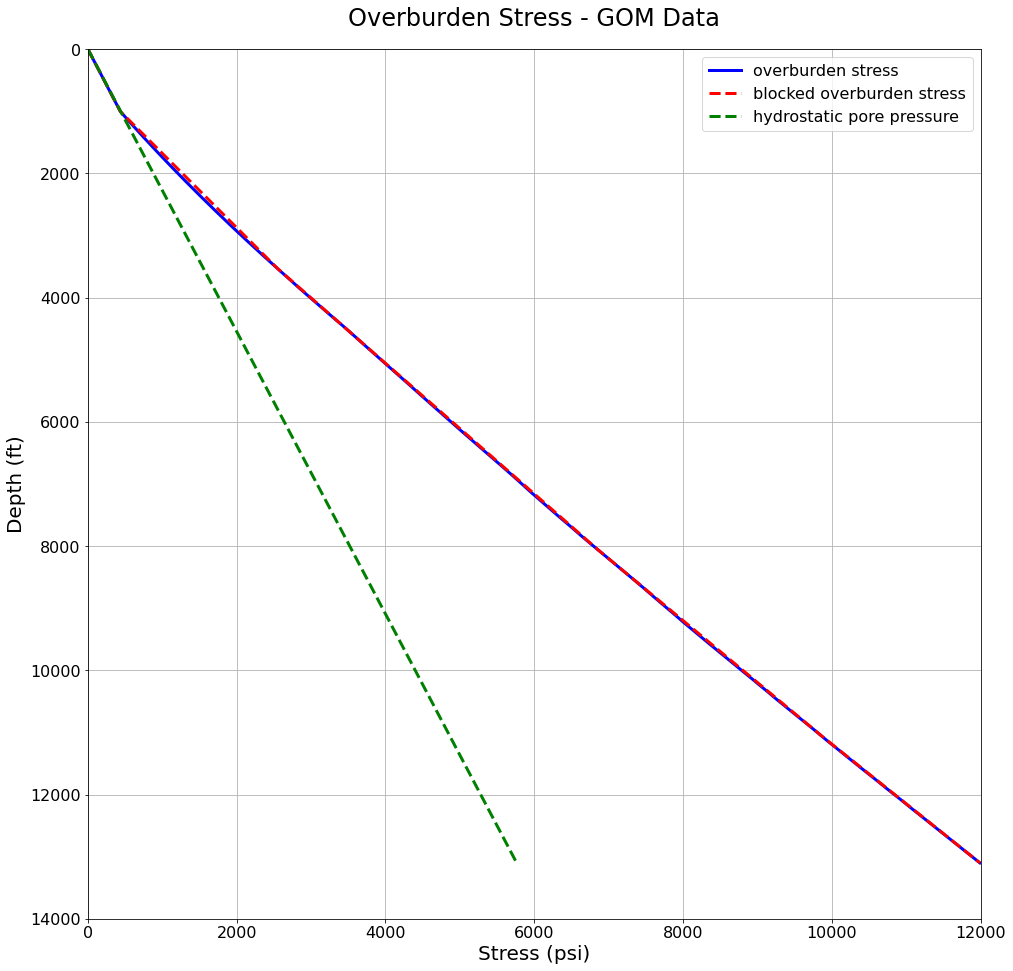

In [34]:
# Plot:
plot_overburden_and_hydrostatic("Overburden Stress - GOM Data", 
                                gom["depth_(ft)"], 
                                gom["overburden_(psi)"], 
                                gom["block_overburden_(psi)"], 
                                gom["hydrostatic_(psi)"])

___

### 4. Calculate the overburden gradient <a class="anchor" id="overburden-gradient"></a>

**"_Calculate the overburden gradient (overburden stress divided by the depth) for each data
set using the continuous density data. Plot the overburden gradient versus depth._"**

Define a function to calculate the gradient.

In [35]:
def set_gradient(df):
    # Calculate the gradient:
    df["gradient_(psi/ft)"] = df["overburden_(psi)"] / df["depth_(ft)"]  # There is a division by zero on the first line.
    df["gradient_(psi/ft)"].at[0] = df["gradient_(psi/ft)"].at[1]  # Fill the first line with the gradient form the second line.    
    # Calculate the blocked gradient:
    df["block_gradient_(psi/ft)"] = df["block_overburden_(psi)"] / df["depth_(ft)"]  # There is a division by zero on the first line.
    df["block_gradient_(psi/ft)"].at[0] = df["block_gradient_(psi/ft)"].at[1]  # Fill the first line with the gradient form the second line.    
    return df

Define a function to plot the gradient.

In [36]:
def plot_gradient(title, y, x1, x2):
    """Function to plot the data."""    
    plt.figure(figsize=(16,16))
    
    # Plot the overburden gradient in psi/ft:
    plt.plot(x1, y, 
             color="blue", 
             linewidth=3.0,
             label="overburden gradient")
    
    # Plot the blocked overburden gradient in psi:
    plt.plot(x2, y, 
             "r--", 
             linewidth=3.0,
             label="blocked overburden gradient")
    
    # Set the Y limits and reverse it:
    plt.ylim(np.int(np.ceil(np.max(y)/1000.))*1000, 0)
    
    # Set x ticks:
    step = 0.05
    x_min = min([np.min(x1), np.min(x2)])
    x_min = np.int(np.floor(x_min/0.05)) * 0.05
    
    x_max = max([np.max(x1), np.max(x2)])
    x_max = 0.05 * np.ceil(x_max / 0.05)
      
    plt.xticks(np.arange(x_min, x_max, step))
        
    # Set the figure title:
    plt.title(title, y= 1.02, fontsize=24)
    
    # Set X and Y titles and font sizes:
    plt.xlabel("Overburden Gradient (psi/ft)", fontsize=20)
    plt.ylabel("Depth (ft)", fontsize=20)
    
    # Set the grid properties
    plt.grid(True)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    # Insert a legend:
    plt.legend(prop={'size': 16})

#### Barnett data:<br>

In [37]:
# Perform the calculations:
barnett = set_gradient(barnett)
# Check:
barnett

,depth_(ft),density_(g/cm^3),block,block_density_(g/cm^3),dz_(ft),hydrostatic_(psi),overburden_(psi),block_overburden_(psi),gradient_(psi/ft),block_gradient_(psi/ft)
0,0.0,1.8778,block_01,2.032218,0.0,0.00,0.000000,0.000000,0.813527,0.880427
1,100.5,1.8778,block_01,2.032218,100.5,44.22,81.759502,88.482890,0.813527,0.880427
2,101.0,1.8709,block_01,2.032218,0.5,44.44,82.164771,88.923104,0.813513,0.880427
3,101.5,1.8317,block_01,2.032218,0.5,44.66,82.561549,89.363317,0.813414,0.880427
4,102.0,1.8363,block_01,2.032218,0.5,44.88,82.959323,89.803530,0.813327,0.880427
...,...,...,...,...,...,...,...,...,...,...
12183,6191.5,2.0703,block_05,2.666482,0.5,2724.26,6826.540958,6832.872559,1.102567,1.103589
12184,6192.0,2.0857,block_05,2.666482,0.5,2724.48,6826.992756,6833.450164,1.102551,1.103593
12185,6192.5,2.1434,block_05,2.666482,0.5,2724.70,6827.457054,6834.027770,1.102536,1.103598
12186,6193.0,2.3314,block_05,2.666482,0.5,2724.92,6827.962075,6834.605376,1.102529,1.103602


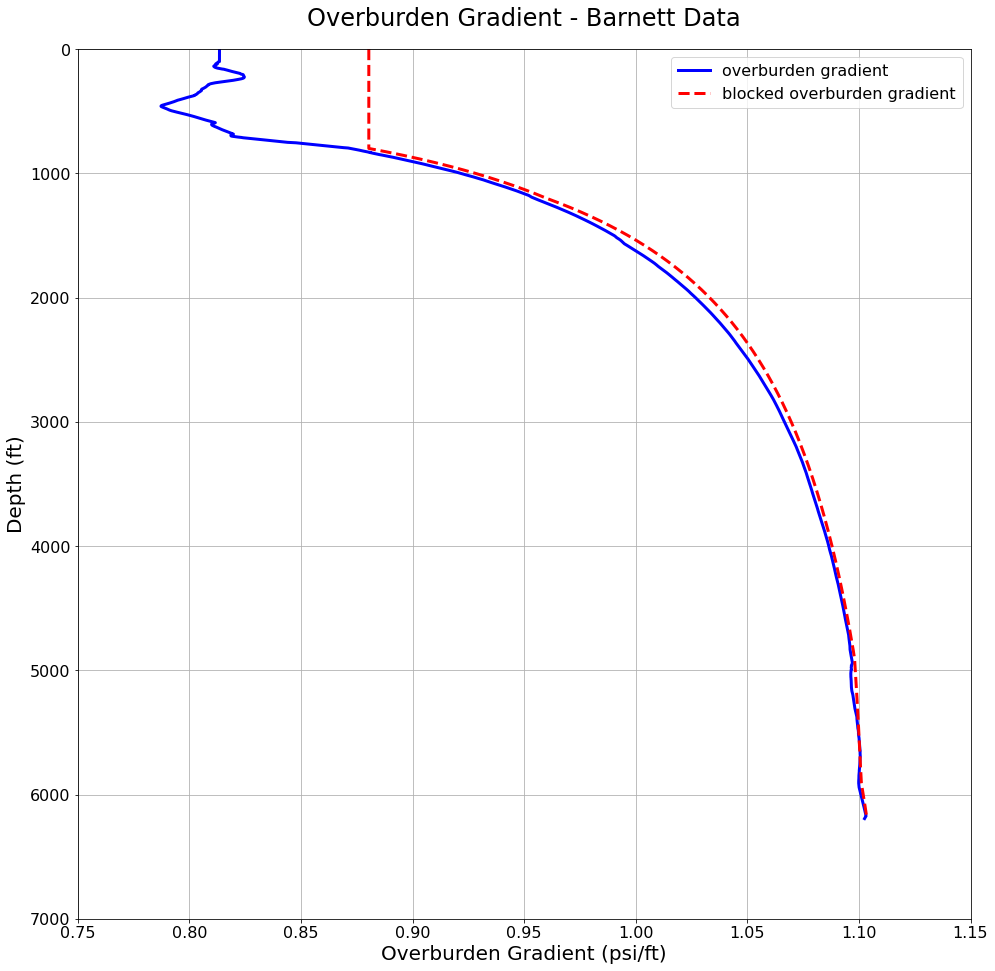

In [38]:
plot_gradient("Overburden Gradient - Barnett Data", 
              barnett["depth_(ft)"], 
              barnett["gradient_(psi/ft)"], 
              barnett["block_gradient_(psi/ft)"])

#### GOM data:<br>

In [39]:
# Perform the calculations:
gom = set_gradient(gom)
# Check:
gom

,depth_(ft),density_(g/cm^3),block,block_density_(g/cm^3),dz_(ft),hydrostatic_(psi),overburden_(psi),block_overburden_(psi),gradient_(psi/ft),block_gradient_(psi/ft)
0,0.0,1.000000,block_01,1.000000,0.0,0.00,0.000000,0.000000,0.433234,0.433234
1,1000.0,1.000000,block_01,1.000000,1000.0,440.00,433.234308,433.234308,0.433234,0.433234
2,1001.0,1.700181,block_02,1.927090,1.0,440.44,433.970884,434.069189,0.433537,0.433636
3,1002.0,1.700361,block_02,1.927090,1.0,440.88,434.707539,434.904071,0.433840,0.434036
4,1003.0,1.700541,block_02,1.927090,1.0,441.32,435.444272,435.738952,0.434142,0.434436
...,...,...,...,...,...,...,...,...,...,...
12097,13096.0,2.314000,block_05,2.403178,1.0,5762.24,11986.550494,11986.363462,0.915283,0.915269
12098,13097.0,2.314000,block_05,2.403178,1.0,5762.68,11987.552998,11987.404601,0.915290,0.915279
12099,13098.0,2.294000,block_05,2.403178,1.0,5763.12,11988.546837,11988.445740,0.915296,0.915288
12100,13099.0,2.294000,block_05,2.403178,1.0,5763.56,11989.540677,11989.486879,0.915302,0.915298


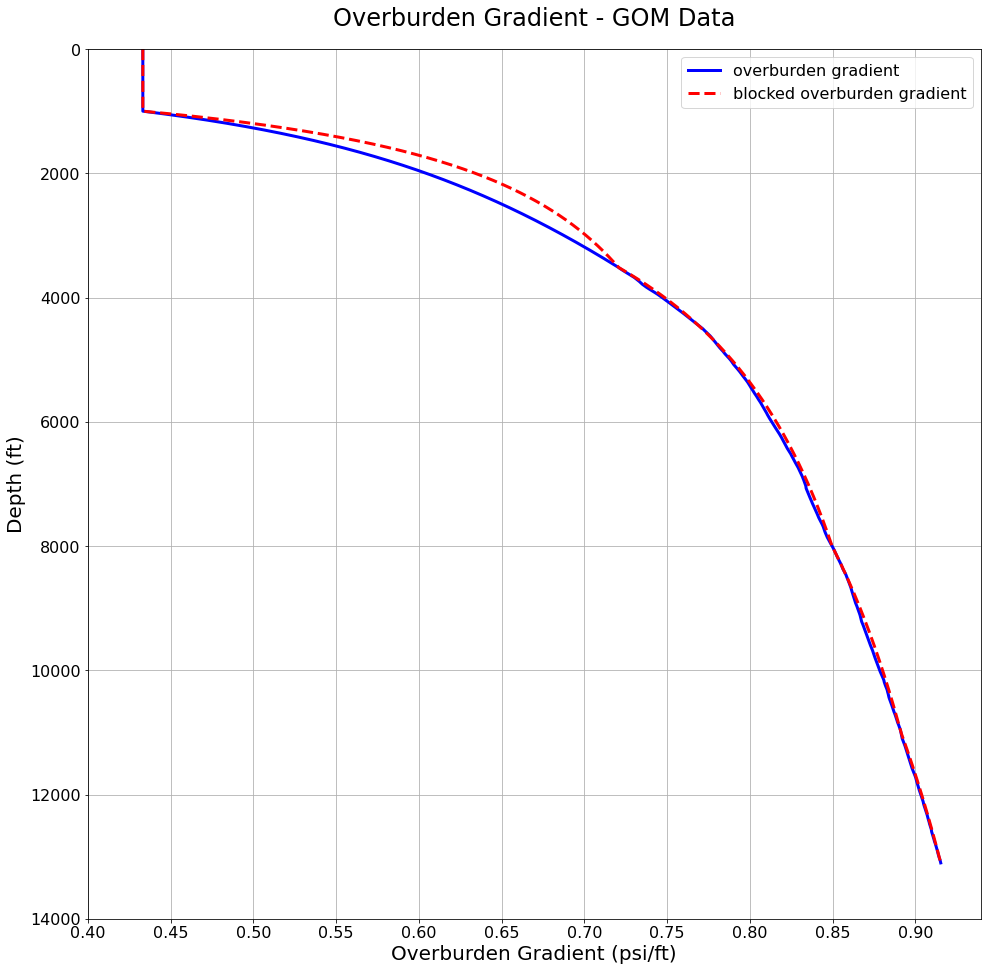

In [40]:
plot_gradient("Overburden Gradient - GOM Data", 
              gom["depth_(ft)"], 
              gom["gradient_(psi/ft)"], 
              gom["block_gradient_(psi/ft)"])

___

## II. Compute porosity from density measurements <a class="anchor" id="compute-porosity"></a>

**"_Use the continuous density data and the formula $\rho_b = (1 - \phi) * \rho_{matrix} + \phi * \rho_{fluid}$ to compute porosity
assuming full saturation of 1.0 g/cm^3 water in the pores. Here $\phi$ is the porosity. For rmatrix, assume 
2.7 g/cm^3, which is a reasonable value for a mixture of qtz, feldspar, mica and clay. Plot porosity as a function of depth for each dataset._"**

Using the given values and formula: $\rho_b = (1 - \phi) * 2.7 + \phi * 1.0$ <br>

Manipulating it, we can calculate the porosity: $\phi = \frac{2,7 - \rho_b}{1,7}$

In [41]:
def set_porosity(df):
    df["porosity"] = (2.7 - df["density_(g/cm^3)"]) / 1.7
    df["block_porosity"] = (2.7 - df["block_density_(g/cm^3)"]) / 1.7
    return df

In [42]:
def plot_porosity(title, y, x1, x2=None):
    """Function to plot the data."""
    plt.figure(figsize=(16,16))
    
    # Plot the x1:
    plt.plot(x1, y, 
             color="blue", 
             linewidth=0.5,
             label="density")
    
    # Plot the x2, if it was given: 
    plt.plot(x2, y, 
             "r--", 
             linewidth=3.0,
             label="blocked density")
    
    # Set the Y limits and reverse it:
    plt.ylim(np.int(np.ceil(np.max(y)/1000.))*1000, 0)
    
    # Set X limits:
    plt.xlim(0.0, None)
    
    # Set the figure title:
    plt.title(title, y= 1.02, fontsize=24)
    
    # Set X and Y titles and font sizes:
    plt.xlabel("Density (g/cm³)", fontsize=20)
    plt.ylabel("Depth (ft)", fontsize=20)
    
    # Set the grid properties
    plt.grid(True)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    # Insert a legend:
    plt.legend(prop={'size': 16})

#### Barnett data:<br>

In [49]:
# Perform the calculations:
barnett = set_porosity(barnett)
# Check:
barnett

,depth_(ft),density_(g/cm^3),block,block_density_(g/cm^3),dz_(ft),hydrostatic_(psi),overburden_(psi),block_overburden_(psi),gradient_(psi/ft),block_gradient_(psi/ft),porosity,block_porosity
0,0.0,1.8778,block_01,2.032218,0.0,0.00,0.000000,0.000000,0.813527,0.880427,0.483647,0.392813
1,100.5,1.8778,block_01,2.032218,100.5,44.22,81.759502,88.482890,0.813527,0.880427,0.483647,0.392813
2,101.0,1.8709,block_01,2.032218,0.5,44.44,82.164771,88.923104,0.813513,0.880427,0.487706,0.392813
3,101.5,1.8317,block_01,2.032218,0.5,44.66,82.561549,89.363317,0.813414,0.880427,0.510765,0.392813
4,102.0,1.8363,block_01,2.032218,0.5,44.88,82.959323,89.803530,0.813327,0.880427,0.508059,0.392813
...,...,...,...,...,...,...,...,...,...,...,...,...
12183,6191.5,2.0703,block_05,2.666482,0.5,2724.26,6826.540958,6832.872559,1.102567,1.103589,0.370412,0.019717
12184,6192.0,2.0857,block_05,2.666482,0.5,2724.48,6826.992756,6833.450164,1.102551,1.103593,0.361353,0.019717
12185,6192.5,2.1434,block_05,2.666482,0.5,2724.70,6827.457054,6834.027770,1.102536,1.103598,0.327412,0.019717
12186,6193.0,2.3314,block_05,2.666482,0.5,2724.92,6827.962075,6834.605376,1.102529,1.103602,0.216824,0.019717


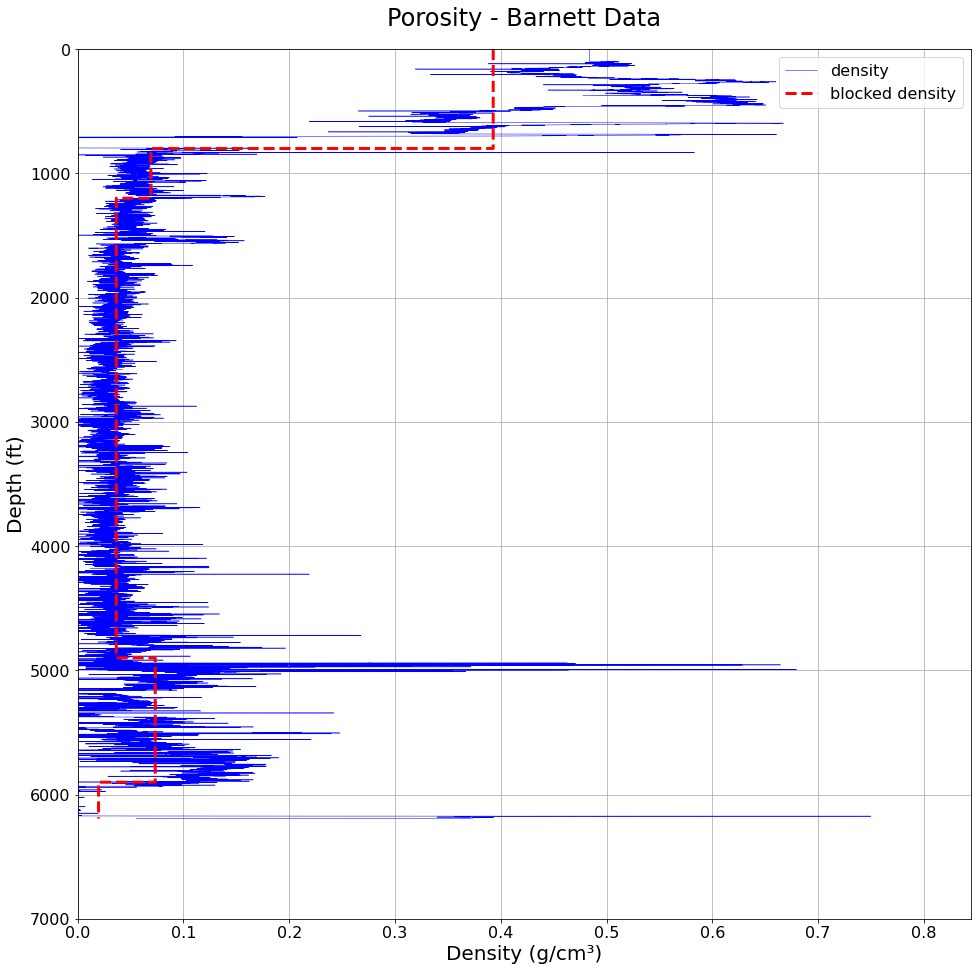

In [45]:
plot_porosity("Porosity - Barnett Data", 
             barnett["depth_(ft)"], 
             barnett["porosity"], 
             barnett["block_porosity"])

#### GOM data:<br>

In [50]:
# Perform the calculations:
gom = set_porosity(gom)
# Check:
gom

,depth_(ft),density_(g/cm^3),block,block_density_(g/cm^3),dz_(ft),hydrostatic_(psi),overburden_(psi),block_overburden_(psi),gradient_(psi/ft),block_gradient_(psi/ft),porosity,block_porosity
0,0.0,1.000000,block_01,1.000000,0.0,0.00,0.000000,0.000000,0.433234,0.433234,1.000000,1.000000
1,1000.0,1.000000,block_01,1.000000,1000.0,440.00,433.234308,433.234308,0.433234,0.433234,1.000000,1.000000
2,1001.0,1.700181,block_02,1.927090,1.0,440.44,433.970884,434.069189,0.433537,0.433636,0.588129,0.454653
3,1002.0,1.700361,block_02,1.927090,1.0,440.88,434.707539,434.904071,0.433840,0.434036,0.588023,0.454653
4,1003.0,1.700541,block_02,1.927090,1.0,441.32,435.444272,435.738952,0.434142,0.434436,0.587917,0.454653
...,...,...,...,...,...,...,...,...,...,...,...,...
12097,13096.0,2.314000,block_05,2.403178,1.0,5762.24,11986.550494,11986.363462,0.915283,0.915269,0.227059,0.174601
12098,13097.0,2.314000,block_05,2.403178,1.0,5762.68,11987.552998,11987.404601,0.915290,0.915279,0.227059,0.174601
12099,13098.0,2.294000,block_05,2.403178,1.0,5763.12,11988.546837,11988.445740,0.915296,0.915288,0.238824,0.174601
12100,13099.0,2.294000,block_05,2.403178,1.0,5763.56,11989.540677,11989.486879,0.915302,0.915298,0.238824,0.174601


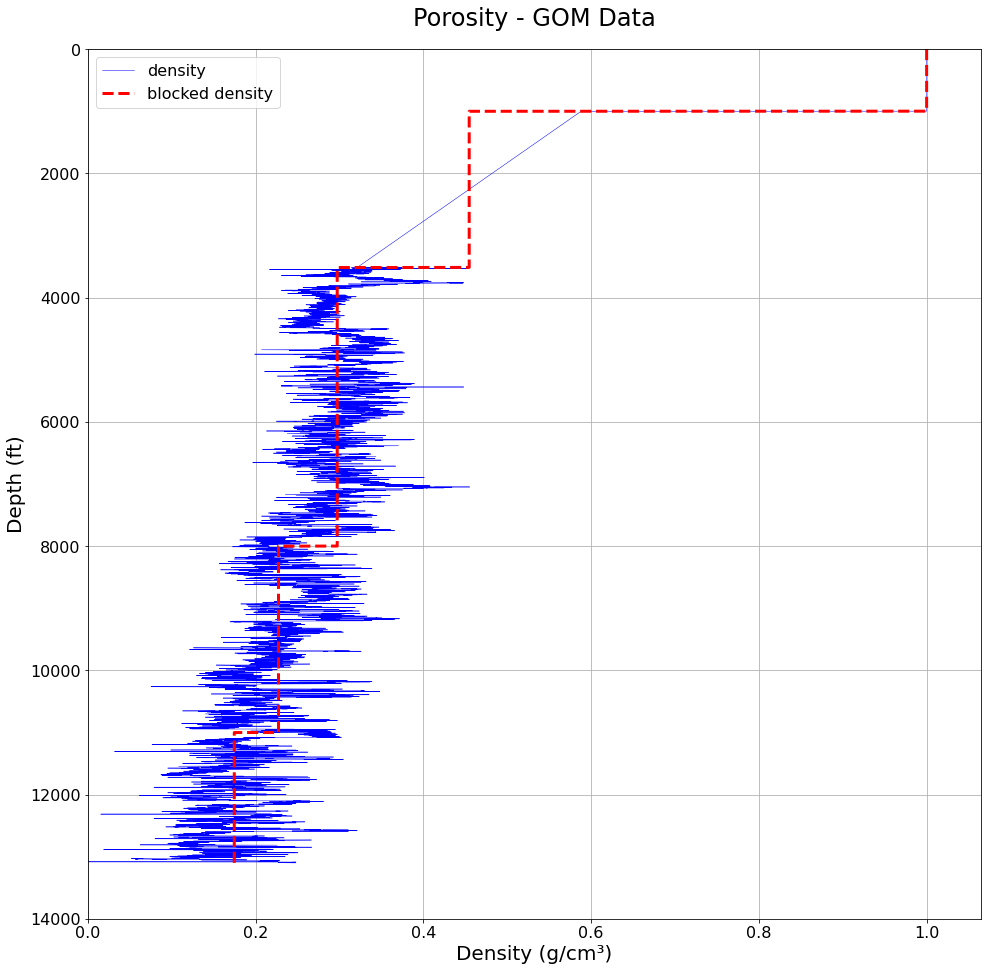

In [47]:
plot_porosity("Porosity - GOM Data", 
             gom["depth_(ft)"], 
             gom["porosity"], 
             gom["block_porosity"])

---

## III. Answer the questions <a class="anchor" id="answer"></a>

**"_Use the calculations from I and II to answer the questions on the page below. The answers will
be posted a day after it is due. Numerical entry-type responses have a range of acceptable values
and are graded electronically, so please adhere to the value of constants given here. We will
specify the units that we want the answer in, so please do not write units in the answer, just write
the number._"**

___

## References <a class="anchor" id="references"></a>

1. Stanford. (n.d.). Reservoir Geomechanics. https://online.stanford.edu/courses/soeees-ygeoresgeo202-reservoir-geomechanics
1. Zoback M. D. (2007). Resevoir Geomechanics. Cambridge University Press
1. Pandas. pandas documentation. (2020, October 30). https://pandas.pydata.org
1. NumPy. NumPy v1.19 Manual. (2020, June 29). https://numpy.org/doc/stable/
1. Matplotlib. Pyplot tutorial. (2020, November 12). https://matplotlib.org/tutorials/introductory/pyplot.html